# Логистическая регрессия для многоклассовой классификации

Будем решать задачу многоклассовой классификации на классическом датасете iris, в котором классы линейно разделимы -  значит логистическая регрессия даст хороший результат.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

Загружаем датасет

In [3]:
iris = datasets.load_iris()

Подробнее изучить информацию о датасете можно либо загуглив,либо, к примеру так.

In [4]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

**1. Готовим данные для обучения. (1 балл)**   
Создайте матрицу признаков Х, которая убдет содержать состоит из (3) - petal length in cm и (4) - petal width in cm.  
Определите вектор классов у.  

In [13]:
data = iris['data']
target = iris['target']
data = np.append(data, target.reshape(-1,1), axis=1)
np.random.shuffle(data)
num_train = int(.8 * len(data))  # 80/20 train/test split
x_train, y_train = data[:num_train, :-1], data[:num_train, -1]
x_test, y_test = data[num_train:, :-1], data[num_train:, -1]
x_train, y_train


(array([[6.3, 2.5, 4.9, 1.5],
        [6. , 2.9, 4.5, 1.5],
        [6.9, 3.2, 5.7, 2.3],
        [5.7, 2.8, 4.1, 1.3],
        [4.6, 3.2, 1.4, 0.2],
        [7.9, 3.8, 6.4, 2. ],
        [6.2, 2.2, 4.5, 1.5],
        [5.6, 3. , 4.1, 1.3],
        [5.6, 2.9, 3.6, 1.3],
        [7.2, 3.2, 6. , 1.8],
        [6.9, 3.1, 5.4, 2.1],
        [7.6, 3. , 6.6, 2.1],
        [4.6, 3.1, 1.5, 0.2],
        [5.4, 3.7, 1.5, 0.2],
        [5.7, 2.9, 4.2, 1.3],
        [4.9, 2.5, 4.5, 1.7],
        [5.1, 3.7, 1.5, 0.4],
        [6.4, 2.9, 4.3, 1.3],
        [5. , 2. , 3.5, 1. ],
        [7.2, 3.6, 6.1, 2.5],
        [5.3, 3.7, 1.5, 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [6.2, 2.8, 4.8, 1.8],
        [5.5, 2.3, 4. , 1.3],
        [5.8, 2.7, 5.1, 1.9],
        [6.2, 2.9, 4.3, 1.3],
        [5.5, 2.5, 4. , 1.3],
        [6.4, 2.8, 5.6, 2.2],
        [5.9, 3. , 5.1, 1.8],
        [5.7, 3.8, 1.7, 0.3],
        [5.7, 4.4, 1.5, 0.4],
        [7.3, 2.9, 6.3, 1.8],
        [5. , 3. , 1.6, 0.2],
        [4

**2. Визуализация данных (2 балла)**  
C помощью matplotlib и scatter plot визуализируйте датасет. Результат должен быть как на картинке. Цвета точек можно задать параметром c=y.
- Правильно построенные график - 1 балл.
- Подписанные оси - 1 балл.
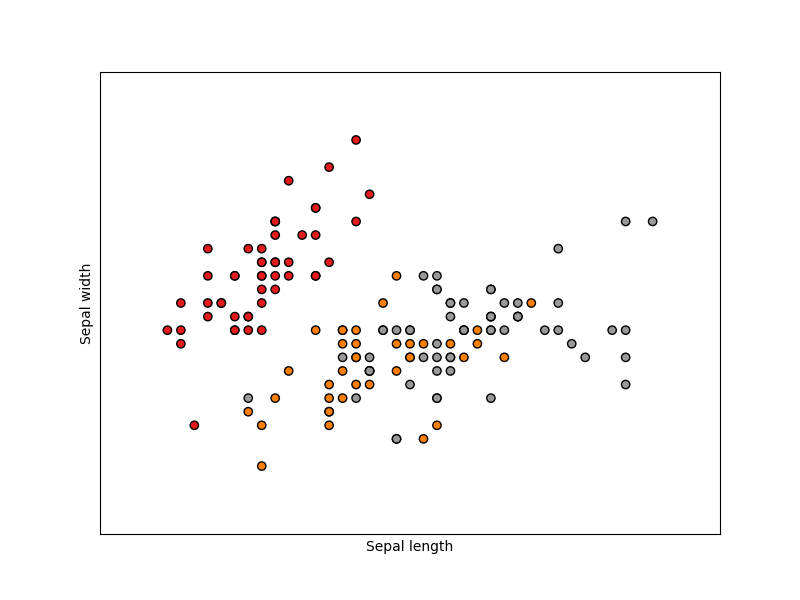


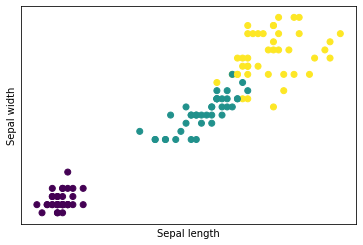

In [7]:
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.scatter(x_train[:,2], x_train[:,3], c=y_train.reshape(-1))

Вспомним, что фукнция sigmoid имеет вид:
$$g(z) = {1 \over 1 + e^{-z}}$$


Функция гипотезы имеет вид:
$$h_ \theta(x) = g(\theta^T x)$$


In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

В качестве функции потерь мы в бинарной классификации используем бинарную кросс  (перекрёстнную) энтропию, которую считаем по формуле:
$$J(\theta) = {1 \over m} \sum\limits_ {i=1}^{m} [-y^{(i)} \log h_ \theta (x^{(i)}) - (1 - y^{(i)}) \log (1-h_ \theta (x^{(i)}))]$$

Кстати, чтобы понять, почему "перекрёстная",мы можем просто визуализировать её. Целевая переменная может принимать значения 1 или 0.

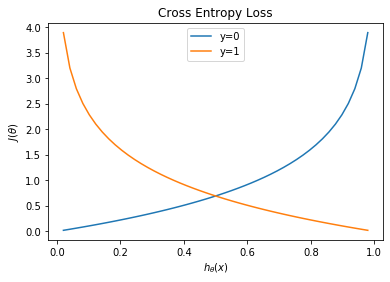

In [9]:
h = np.linspace(0, 1)[1:-1]
for y_train in [0, 1]:
    plt.plot(h, -y_train * np.log(h) - (1 - y_train) * np.log(1 - h), label=f"y={y_train}")
plt.title("Cross Entropy Loss") 
plt.xlabel('$h_ {\\theta}(x)$'); plt.ylabel('$J(\\theta)$')
plt.legend();

Мы можем видеть, что правильный прогноз класса будет значение функции потерь 0. При этом значение функции потерь стремится к бесконечности, когда прогноз ближе к неправильному классу.

Градиент бинарной бинарной кросс энтропии имеет вид:  
$${\partial J(\theta)\over \partial\theta} = {1 \over m} \sum\limits_ {i=1}^{m} (h_ \theta (x^{(i)})-y^{(i)})x^{(i)}$$

**3. Напишите функцию, которая возвращает значение функции ошибки ошибки и её градиента
 (3 балла)**

In [10]:
def cost(theta, x, y):
    h = sigmoid(np.dot(x, theta))
    m = len(y)
    epsilon = 1e-5
    cost = 1 / m * np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h))
    grad = 1 / m * ((y - h) @ x)
    return cost, grad

**4. Напишите функцию fit(...) которая будет выполнять классификацию по стратегии [one-vs.-rest](https://en.wikipedia.org/wiki/Multiclass_classification#One-vs.-rest) (cost function)(1 балл)**  

Обновление параметров необходимо делать согласно градиентному спуску.

In [11]:
def fit(x, y, max_iter=5000, alpha=0.1):
    x = np.insert(x, 0, 1, axis=1)
    thetas = []
    classes = np.unique(y)
    costs = np.zeros(max_iter)

    for c in classes:
        # one vs. rest binary classification
        binary_y = np.where(y == c, 1, 0)

        theta = np.zeros(x.shape[1])
        for epoch in range(max_iter):
            costs[epoch], grad = cost(theta, x, binary_y)
            theta += alpha * grad

        thetas.append(theta)
    return thetas, classes, costs

**5. Напишите функцию predict(...), которая будет давать предсказания классов (дискретные значения) (3 балла).**

In [12]:
def predict(classes, thetas, x):
    x = np.insert(x, 0, 1, axis=1)
    preds = []
    for xi in x:
        temp = []  
        for theta in thetas:
            temp.append(sigmoid(np.dot(xi, theta))) 
        preds.append(np.argmax(temp))    
        
    return [classes[p] for p in preds]

Запускаем тренировку и строим график функции потерь.

[array([ 7.85757648, -2.15958111, -3.24755241]), array([-2.66423984,  1.44587446, -3.02533614]), array([-10.29406278,   0.40382758,   5.18609279])]
[0. 1. 2.]
[0.69314718 0.68978493 0.68654947 ... 0.14442323 0.14441441 0.1444056 ]


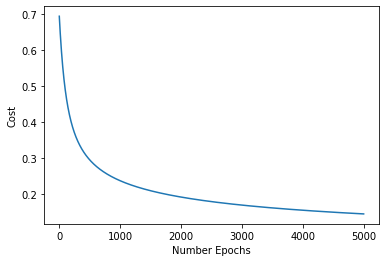

In [14]:
thetas, classes, costs = fit(x_train[:, 2:], y_train)
print(thetas)
print(classes)
print(costs)
plt.plot(range(len(costs)), costs)
plt.xlabel('Number Epochs'); plt.ylabel('Cost');


Посмотрим на линии, которые мы нашли в результате обучения модели и как они разделяют классы.
Если всё прошло правильно, то должно получиться нечно такое:
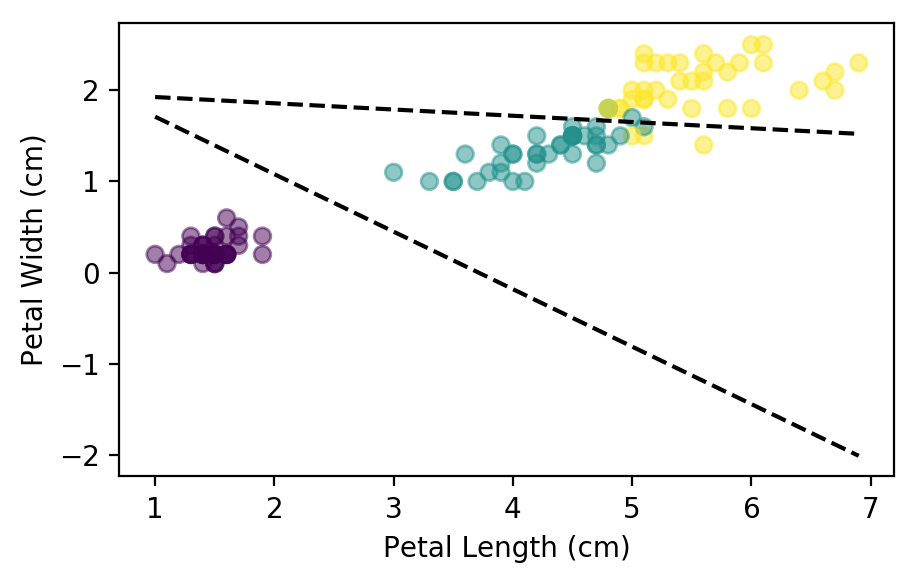

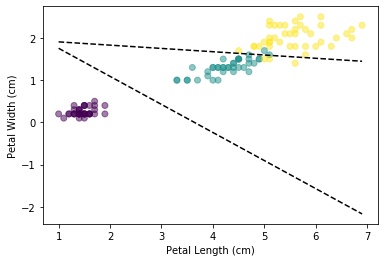

In [15]:
plt.scatter(x_train[:,2], x_train[:, 3], c=y_train.reshape(-1), alpha=0.5)
plt.xlabel("Petal Length (cm)"); plt.ylabel("Petal Width (cm)");
for theta in [thetas[0],thetas[2]]:
    j = np.array([x_train[:, 2].min(), x_train[:, 2].max()])
    k = -(j * theta[1] + theta[0]) / theta[2]
    plt.plot(j, k, color='k', linestyle="--")

**6. Посчитайте точность классификации - accuracy.** 
    - Имплементируйте самостоятельно функцию accuracy - 1 балл  
    - Воспользуйтесь функцией sklearn.metrics.accuracy_score  - 1 балл

In [16]:
def score(classes, theta, x, y):
    return np.mean(predict(classes, theta, x) == y)

a = score(classes, thetas, x_train[:, 2:], y_train)
print(f"For train data: {a}")
b = score(classes, thetas, x_test[:, 2:], y_test)
print(f"For test data: {b}")

For train data: 0.9333333333333333
For test data: 0.9333333333333333


In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix
def sklearn_accuracy(classes, thetas, x, y):
    # YOUR CODE HERE
    score = accuracy_score(y, predict(classes, thetas, x))
    return score

print(sklearn_accuracy(classes, thetas, x_train[:, 2:], y_train))
print(sklearn_accuracy(classes, thetas, x_test[:, 2:], y_test))

0.9333333333333333
0.9333333333333333


**7. Выведите [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) классификации c помощью фукнции metrics.confusion_matrix (1 балл)**

[[39  0  0]
 [ 0 35  4]
 [ 0  4 38]]


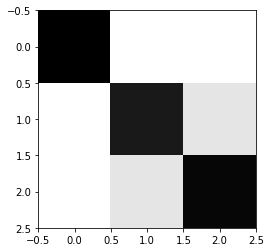

In [18]:
conf = confusion_matrix(y_train, predict(classes, thetas, x_train[:, 2:]), labels=classes)
print(conf)
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

**7*. Какие классы больше всего модель путает между собой? Дать ответ в виде названия классов, а не [0,1,2] (2 балла)**

Больше всего модель путает между собой класс Iris-Versicolour и Iris-Virginica.
 

**8. Посчитайте precision, recall, F-1 score для классификации классов 0 и 1.**
То есть задача сводится к подсчёту результата бинарной классификации.

    - Имплементируйте три метрики самостоятельно - 3 балла (по 1 баллу за каждую метрику) 
    - Воспользуйтесь функцией sklearn.metrics.precision_recall_fscore_support  - 3 балла (по 1 баллу за каждую метрику) 

**Вы молодец!  
Ноутбук - на гитхаб. Ссылку в LMS.**